# Import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset

In [2]:
df = pd.read_csv(r'cleveland.csv')
df.columns =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df['target'] = list(map(lambda x : 1 if x != 0 else 0, df['target']))
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


### Plot Distribution of target and age

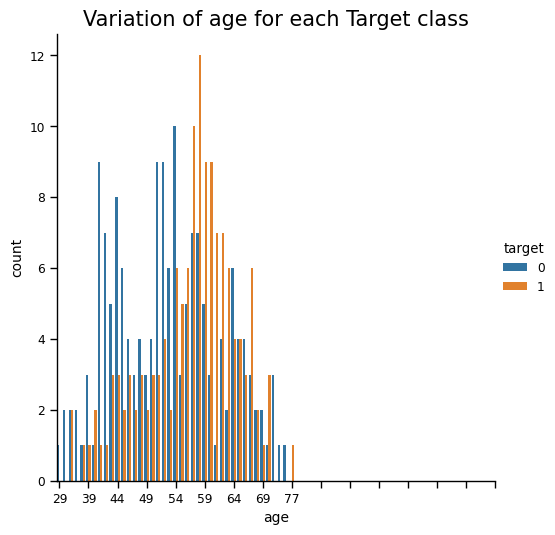

In [3]:
sns.set_context('paper',
                font_scale=1,
                rc={
                    "font.size":3,
                    "axes.titlesize":15,
                    "axes.labelsize":10,
                })

ax = sns.catplot(kind='count',
                 data=df,
                 x='age',
                 hue='target',
                 order=df.age.sort_values().unique())

ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of age for each Target class')
plt.show()

### Plot Distribution of age and sex with the target

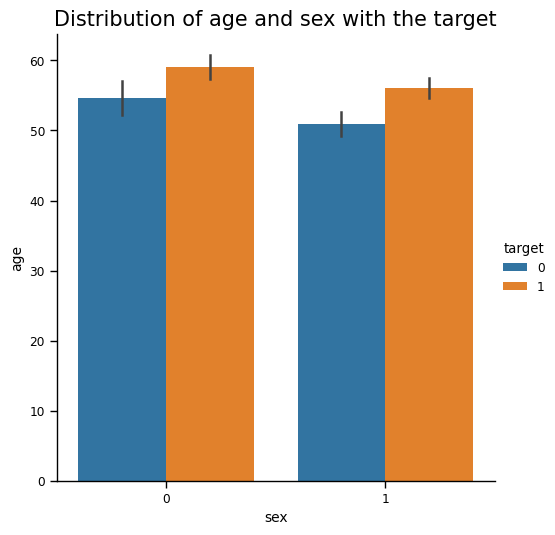

In [4]:
sns.set_context('paper',
                font_scale=1,
                rc={
                    "font.size":3,
                    "axes.titlesize":15,
                    "axes.labelsize":10,
                })

sns.catplot(kind='bar',
                 data=df,
                 x='sex',
                 y='age',
                 hue='target')
plt.title('Distribution of age and sex with the target')
plt.show()

### KNN 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, model.predict(X_train))

print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.61
